In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# reading csv file
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

# Cleaning

#### Looking for duplicated valuse, but there is no dublicated values to be dropped

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### Looking for null values , but there is no null valuses to be dropped

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Check for logical errors


In [ ]:
#it suppose if there is no phone serviece the value in Multiplelines to be No phone service
df.query('PhoneService=="No" and MultipleLines!="No phone service"')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
#it suppose if there is no inernetservice the value in those columns to be No phone service
df.query(('InternetService=="No" and OnlineSecurity!="No internet service"')or \
         ('InternetService=="No" and DeviceProtection!="No internet service"')or\
         ('InternetService=="No" and TechSupport!="No internet service"')or\
         ('InternetService=="No" and StreamingTV!="No internet service"')or\
         ('InternetService=="No" and StreamingMovies!="No internet service"'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Unify binary data

In [ ]:
# replace yes with 1 and no with 0 in PhoneService
df.loc[df["PhoneService"] == "Yes", "PhoneService"] = 1

df.loc[df["PhoneService"] == "No", "PhoneService"] = 0

In [ ]:
df["PhoneService"].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [ ]:
# replace no with 0 in InternetService
df.loc[df["InternetService"] == "No", "InternetService"] = 0

In [ ]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [ ]:
# replace yes with 1 and no with 0 in Churn
df.loc[df["Churn"] == "Yes", "Churn"] = 1

df.loc[df["Churn"] == "No", "Churn"] = 0

In [ ]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Insights and Analysis

### 1- Relation between senior citizen and churn

In [ ]:
#  propotion
df['SeniorCitizen'].value_counts()/df.shape[0]

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [ ]:
# the propotion churns of the senior citizen in the whole data 
df[(df['SeniorCitizen']==1) & (df['Churn']==1)].shape[0]/df.shape[0]

0.06758483600738321

In [ ]:
## the propotion churns of the senior citizens in the senior citiizens propotion  

df[(df['SeniorCitizen']==1) & (df['Churn']==1)].shape[0]/df[df['SeniorCitizen']==1].shape[0]

0.4168126094570928

In [ ]:
# the propotion churns of  not senior citizen in the whole data 

df[(df['SeniorCitizen']==0) & (df['Churn']==1)].shape[0]/df.shape[0]

0.19778503478631265

In [ ]:
## the propotion churns of not senior citizens in the senior citiizens propotion  

df[(df['SeniorCitizen']==0) & (df['Churn']==1)].shape[0]/df[df['SeniorCitizen']==0].shape[0]

0.23606168446026096

### 2- relation between InternetService and churn

In [ ]:
#the propotion
df['InternetService'].value_counts()/df.shape[0]

Fiber optic    0.439585
DSL            0.343746
0              0.216669
Name: InternetService, dtype: float64

In [ ]:
# propotion of churn from customers who used fiber optic in the whole dataset
df[(df['InternetService']=="Fiber optic") & (df['Churn']==1)].shape[0]/df.shape[0]

0.18415447962515974

In [ ]:
# propotion of churn from customers who used fiber optic in fiber optics user

df[(df['InternetService']=="Fiber optic") & (df['Churn']==1)].shape[0]/df[df['InternetService']=="Fiber optic"].shape[0]

0.4189276485788114

In [ ]:
# propotion of churn from customers who used DSL in the whole dataset

df[(df['InternetService']=="DSL") & (df['Churn']==1)].shape[0]/df.shape[0]

0.06517109186426238

In [ ]:
# propotion of churn from customers who used DSL in DSL user

df[(df['InternetService']=="DSL") & (df['Churn']==1)].shape[0]/df[df['InternetService']=="DSL"].shape[0]

0.1895910780669145

In [ ]:
# propotion of churn from customers who have no internet service in the whole dataset

df[(df['InternetService']==0) & (df['Churn']==1)].shape[0]/df.shape[0]

0.016044299304273747

In [ ]:
# propotion of churn from customers who have no internet service in no internet service user

df[(df['InternetService']==0) & (df['Churn']==1)].shape[0]/df[df['InternetService']==0].shape[0]

0.07404980340760157

### 3-relation between gender and churn

In [ ]:
# propotion of gender 

df['gender'].value_counts()/df.shape[0]

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [ ]:
# propotion of churn from female customers in the whole dataset

df[(df['gender']=="Female") & (df['Churn']==1)].shape[0]/df.shape[0]

0.133323867670027

In [ ]:
# propotion of churn from female customers in the female users

df[(df['gender']=="Female") & (df['Churn']==1)].shape[0]/df[df['gender']=="Female"].shape[0]

0.26920871559633025

In [ ]:
# propotion of churn from male customers in the whole dataset

df[(df['gender']=="Male") & (df['Churn']==1)].shape[0]/df.shape[0]

0.1320460031236689

In [ ]:
# propotion of churn from male customers in the male users

df[(df['gender']=="Male") & (df['Churn']==1)].shape[0]/df[df['gender']=="Male"].shape[0]

0.2616033755274262

### 4- the relation between phone service and churn

In [ ]:
#propotion of phoneservice
df['PhoneService'].value_counts()/df.shape[0]

1    0.903166
0    0.096834
Name: PhoneService, dtype: float64

In [ ]:
# propotion of churn from customers who have no Phone service in the whole dataset

df[(df['PhoneService']==0) & (df['Churn']==1)].shape[0]/df.shape[0]

0.02413744143120829

In [ ]:
# propotion of churn from customers who have no Phone service in no Phone service user

df[(df['PhoneService']==0) & (df['Churn']==1)].shape[0]/df[df['PhoneService']==0].shape[0]

0.24926686217008798

In [ ]:
# propotion of churn from customers who have  Phone service in the whole dataset
df[(df['PhoneService']==1) & (df['Churn']==1)].shape[0]/df.shape[0]


0.24123242936248757

In [ ]:
# propotion of churn from customers who have Phone service in Phone service user

df[(df['PhoneService']==1) & (df['Churn']==1)].shape[0]/df[df['PhoneService']==1].shape[0]

0.2670963684955196

### 5- the relation between phone service and internet service and churn

In [ ]:
# propotion of churn from customers who have no Phone service and have internet service in the whole dataset

df[(df['PhoneService']==0) & (df['InternetService']!=0) & (df['Churn']==1)].shape[0]/df.shape[0]

0.02413744143120829

In [ ]:
# propotion of churn from customers who have no Phone service and have internet service in
#customers who have no Phone service and have internet service

df[(df['PhoneService']==0) & (df['InternetService']!=0) & (df['Churn']==1)].shape[0]/\
df[(df['PhoneService']==0) & (df['InternetService']!=0)].shape[0]

0.24926686217008798

In [ ]:
# propotion of churn from customers who have no internet service and have Phone service in the whole dataset
df[(df['PhoneService']==1) & (df['InternetService']==0) & (df['Churn']==1)].shape[0]/df.shape[0]

0.016044299304273747

In [ ]:
# propotion of churn from customers who have Phone service and have no internet service in
#customers who hav Phone service and have no internet service
df[(df['PhoneService']==1) & (df['InternetService']==0) & (df['Churn']==1)].shape[0]/\
df[(df['PhoneService']==1) & (df['InternetService']==0)].shape[0]

0.07404980340760157

In [ ]:
# propotion of churn from customers who have internet service and have Phone service in the whole dataset
df[(df['PhoneService']==1) & (df['InternetService']!=0) & (df['Churn']==1)].shape[0]/df.shape[0]

0.22518813005821384

In [ ]:
# propotion of churn from customers who have Phone service and have internet service in
#customers who hav Phone service and have internet service
df[(df['PhoneService']==1) & (df['InternetService']!=0) & (df['Churn']==1)].shape[0]/\
df[(df['PhoneService']==1) & (df['InternetService']!=0)].shape[0]

0.3280248190279214

### 6- relation between contract and churn

In [ ]:
# the type of contract
df['Contract'].value_counts()/df.shape[0]

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [ ]:
# propotion of churn from customers who have Month-to-month contract in the whole data set

df[(df['Contract']=='Month-to-month') & (df['Churn']==1)].shape[0]/df.shape[0]

0.2349850915802925

In [ ]:
# propotion of churn from customers who have Month-to-month contract in Month-to-month users

df[(df['Contract']=='Month-to-month') & (df['Churn']==1)].shape[0]/df[df['Contract']=='Month-to-month'].shape[0]

0.4270967741935484

In [ ]:
# propotion of churn from customers who have One year contract in the whole data set

df[(df['Contract']=='One year') & (df['Churn']==1)].shape[0]/df.shape[0]

0.02356950163282692

In [ ]:
# propotion of churn from customers who have One year contract in One year users

df[(df['Contract']=='One year') & (df['Churn']==1)].shape[0]/df[df['Contract']=='One year'].shape[0]

0.11269517990495587

In [ ]:
# propotion of churn from customers who have Two year contract in the whole data set

df[(df['Contract']=='Two year') & (df['Churn']==1)].shape[0]/df.shape[0]

0.006815277580576459

In [ ]:
# propotion of churn from customers who have Two year contract in Two year users

df[(df['Contract']=='Two year') & (df['Churn']==1)].shape[0]/df[df['Contract']=='Two year'].shape[0]

0.02831858407079646

# planning 

In [ ]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [ ]:
df['SeniorCitizen'].mean()

0.1621468124378816

In [ ]:
df[(df['Churn'] == 1 )]['SeniorCitizen'].mean()

0.2546816479400749

In [ ]:
df[(df['PhoneService'] == 1)]['SeniorCitizen'].mean()

0.16318188963999372

In [ ]:
df[(df['PhoneService'] == 0)]['SeniorCitizen'].mean()

0.15249266862170088

In [ ]:
df[(df['InternetService'] == 0)]['SeniorCitizen'].mean()

0.03407601572739188

In [ ]:
df[(df['InternetService'] == "Fiber optic" )].shape[0]

3096

In [ ]:
df[((df['InternetService'] == "Fiber optic" ) & (df['Churn']==1))].mean()

SeniorCitizen      0.303007
tenure            20.196608
PhoneService       1.000000
MonthlyCharges    88.126484
Churn              1.000000
dtype: float64

In [ ]:
(df[((df['InternetService'] == "Fiber optic" ) & (df['Churn'] == 1 ))].shape[0])/df.shape[0]

0.18415447962515974

In [ ]:
(df[((df['InternetService'] == "DSL" ) & (df['Churn'] == 1 ))].shape[0])/df.shape[0]

0.06517109186426238

In [ ]:
(df[((df['InternetService'] == 0 ) & (df['Churn'] == 1 ))].shape[0])/df.shape[0]

0.016044299304273747

# visualization

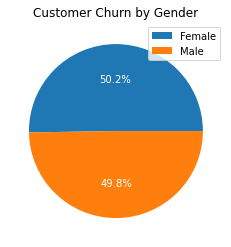

In [ ]:
df_ = df.groupby(["gender"])["Churn"].sum()
df_.plot.pie(autopct='%.1f%%', textprops=dict(color="w"))
plt.title('Customer Churn by Gender')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

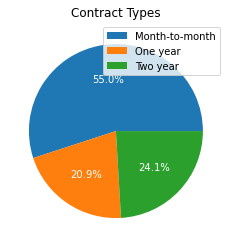

In [ ]:
df_ = df.groupby(["Contract"])["customerID"].count()
df_.plot.pie(autopct='%.1f%%', textprops=dict(color="w"))
plt.title('Contract Types')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

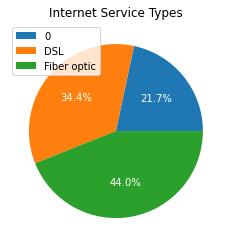

In [ ]:
df_ = df.groupby(["InternetService"])["customerID"].count()
df_.plot.pie(autopct='%.1f%%', textprops=dict(color="w"))
plt.title('Internet Service Types')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

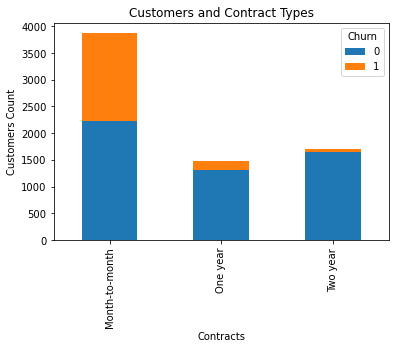

In [ ]:
df_ = df.groupby(["Contract", "Churn"])["customerID"].count().unstack("Churn")
df_.plot.bar(stacked=True)
plt.title('Customers and Contract Types')
plt.xlabel('Contracts')
plt.ylabel('Customers Count')
plt.show()

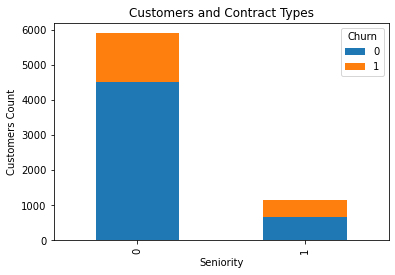

In [ ]:
df_ = df.groupby(["SeniorCitizen", "Churn"])["customerID"].count().unstack("Churn")
df_.plot.bar(stacked=True)
plt.title('Customers and Contract Types')
plt.xlabel('Seniority')
plt.ylabel('Customers Count')
plt.show()

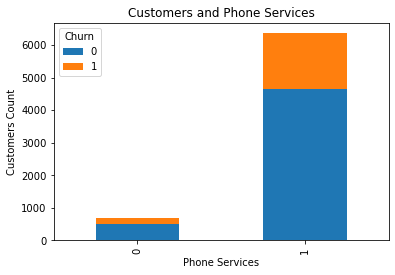

In [ ]:
df_ = df.groupby(["PhoneService", "Churn"])["customerID"].count().unstack("Churn")
df_.plot.bar(stacked=True)
plt.title('Customers and Phone Services')
plt.xlabel('Phone Services')
plt.ylabel('Customers Count')
plt.show()

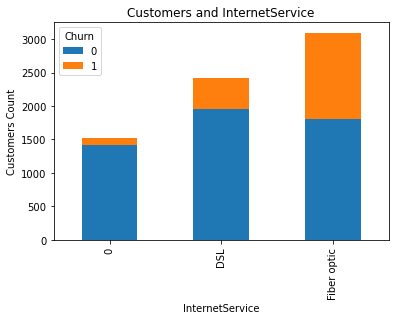

In [ ]:
df_ = df.groupby(["InternetService", "Churn"])["customerID"].count().unstack("Churn")
df_.plot.bar(stacked=True)
plt.title('Customers and InternetService')
plt.xlabel('InternetService')
plt.ylabel('Customers Count')
plt.show()

In [ ]:
df_ = df.groupby(["PhoneService", "Churn"])["customerID"].count().unstack("Churn")
df_

Churn,0,1
PhoneService,,
0,512,170
1,4662,1699


# Hypothesis testing

## Null Hypothesis, customer with no phone service are more likely to churn
### Mean churn phone service >= mean churn no phone service
### H0: Mph >= MNoph
### H1: Mph < MNoPh
### H0: Mph - MNoph >= 0
#### H1: Mph - MNph < 0

In [ ]:
MNoph = df[df["PhoneService"] == 0]["Churn"].mean()
Mph = df[df["PhoneService"] == 1]["Churn"].mean()
obs_diff = Mph - MNoph
obs_diff

0.01782950632543162

In [ ]:
n = df.shape[0]
diff = []
for _ in range(10000):
    b_samp = df.sample(n, replace=True)
    MNoph = b_samp[b_samp["PhoneService"] == 0]["Churn"].mean()
    Mph = b_samp[b_samp["PhoneService"] == 1]["Churn"].mean()
    diff_ = Mph - MNoph
    diff.append(diff_)

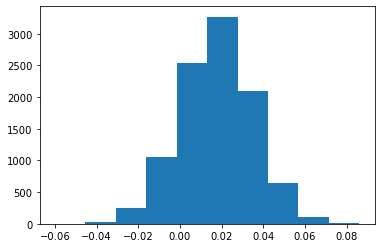

In [ ]:
diff = np.array(diff)
plt.hist(diff)
plt.show()

In [ ]:
null_vals = np.random.normal(0, np.std(diff), diff.size)

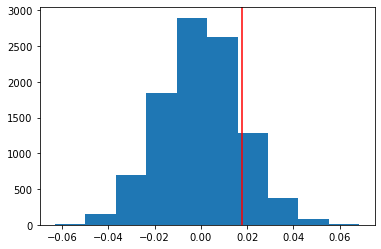

In [ ]:
plt.hist(null_vals);
# plot line for observed statistic
plt.axvline(obs_diff, color='r')
plt.show()

In [ ]:
# compute p value
(null_vals > obs_diff).mean()

0.1503

## We fail to reject the null hypothesis